# UNIVERSIDAD SANTO TOMÁS
## Facultad de Ingeniería Electrónica
### Visión Artificial

Regresión lineal con múltiples variables

Prerequisitos:
* sklearn

Importar librerías en general

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
# import seaborn as sns 

%matplotlib inline

### Importando el dataset

De la librería *sklearn*, importar el dataset de precios de casas en Boston.

In [2]:
from sklearn.datasets import load_boston

Descargar el dataset y guardarlo en variables locales (la descarga sólo se hace la primera vez):

In [3]:
boston_dataset = load_boston()

*boston_dataset* es un diccionario, a continuación las llaves que lo componen:

In [4]:
print(boston_dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


## Datos de Entrenamiento

### Entradas $X$

Los datos de *data* corresponden a las entradas del dataset, $X$, y se almacenan en un arreglo de *numpy*.

In [5]:
X = boston_dataset.data
print(type(X))

<class 'numpy.ndarray'>


*X* tiene 506 registros, cada uno con 13 características:

In [6]:
print( f'X.shape = {X.shape}' )

X.shape = (506, 13)


Cada característica corresponde a un número decimal, por ejemplo el quinto registro:

In [7]:
print(X[4])

[6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
 5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
 5.3300e+00]


El dataset incluye una descripción de cada una de las características:

In [8]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Objetivos $Y$

Cada muestra de $X$ tiene un correspondiente valor en $Y$, en este caso, el precio de la casa:

In [9]:
Y = boston_dataset.target
print(f'Y.shape={Y.shape}')

Y.shape=(506,)


El costo de la casa correspondiente al quinto registro:

In [10]:
print(f'Y[4]={Y[4]}')

Y[4]=36.2


### Centrado y escalizado de los datos

Cálculo del promedio

In [11]:
X_med = np.mean(X, axis=0)
print(f'X_med={X_med}')

X_med=[3.61352356e+00 1.13636364e+01 1.11367787e+01 6.91699605e-02
 5.54695059e-01 6.28463439e+00 6.85749012e+01 3.79504269e+00
 9.54940711e+00 4.08237154e+02 1.84555336e+01 3.56674032e+02
 1.26530632e+01]


Resta del promedio:

In [12]:
X = X - X_med
print(f'X.shape={X.shape}')

X.shape=(506, 13)


Cálculo de la desviación estándar:

In [13]:
X_std = np.std(X, axis=0)
print(f'X_std={X_std}')

X_std=[8.59304135e+00 2.32993957e+01 6.85357058e+00 2.53742935e-01
 1.15763115e-01 7.01922514e-01 2.81210326e+01 2.10362836e+00
 8.69865112e+00 1.68370495e+02 2.16280519e+00 9.12046075e+01
 7.13400164e+00]


Normalización:

In [14]:
X = X/X_std
print(f'X.shape={X.shape}')

X.shape=(506, 13)


Agregando unos para el *bias*:

In [15]:
X = np.append( np.ones((X.shape[0],1)), X, axis=1)
print(f'X.shape={X.shape}')

X.shape=(506, 14)


### Hipótesis:

$$y'=H_W(x)=W\bullet x$$

In [16]:
class H:
    
    def __init__(self, D):
        self.D = D
        self.W = np.random.rand(self.D)
        
    def __call__(self, x):
        return np.sum( self.W * x )
    
    def reset(self):
        self.W = np.random.rand(self.D)

In [17]:
m = X.shape[0]
D = X.shape[1]
h = H(D)

Predicción:

In [18]:
def predict(X):
    y_ = np.array([h(x) for x in X])
    return y_

Cálculo de la pérdida:

In [19]:
def calc_loss(X, Y):
    J = (1/(2*m))*np.sum( (predict(X) - Y)**2 )
    return J

Cálculo de gradiente:

In [20]:
def calc_gradient(X, Y):
    dJ = np.zeros(D)
    errors = predict(X)-Y
    for d in range(D):
        dJ[d] = (1/m)*sum(errors*X[:,d])
    return dJ

### Entrenamiento

Parámetros

In [21]:
h.reset()
alpha = 0.01
num_episodes = 100

losses = []

Entrenamiento

In [22]:
for i in range(num_episodes):
    h.W = h.W - alpha * calc_gradient(X, Y)
    loss = calc_loss(X, Y)
    losses.append(loss)

Curva de entrenamiento:

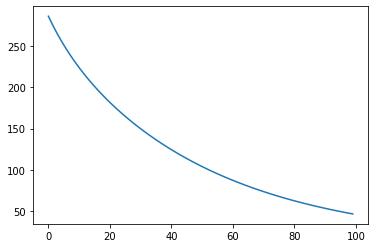

In [23]:
plt.plot(losses)

<font color='red'>Tasa de aprendizaje muy baja, o muy pocas iteraciones</font>

In [24]:
h.reset()
alpha = 0.35
num_episodes = 100

losses = []

Entrenamiento

In [25]:
for i in range(num_episodes):
    h.W = h.W - alpha * calc_gradient(X, Y)
    loss = calc_loss(X, Y)
    losses.append(loss)

Curva de entrenamiento:

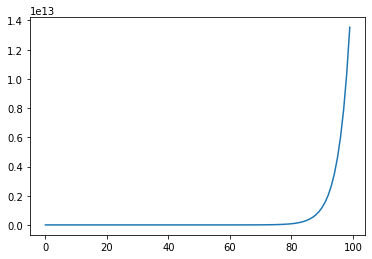

In [26]:
plt.plot(losses)

<font color='red'>Tasa de aprendizaje muy alta.</font>

In [27]:
h.reset()
alpha = 0.1
num_episodes = 100

losses = []

Entrenamiento

In [28]:
for i in range(num_episodes):
    h.W = h.W - alpha * calc_gradient(X, Y)
    loss = calc_loss(X, Y)
    losses.append(loss)

Curva de entrenamiento:

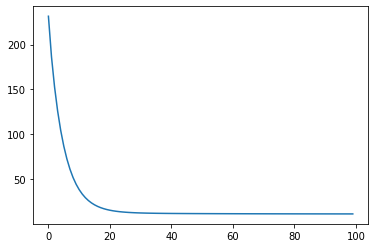

In [29]:
plt.plot(losses)

<font color='red'>Tasa de aprendizaje muy alta, o muchas iteraciones</font>

In [30]:
h.reset()
alpha = 0.1
num_episodes = 50

losses = []

Entrenamiento

In [31]:
for i in range(num_episodes):
    h.W = h.W - alpha * calc_gradient(X, Y)
    loss = calc_loss(X, Y)
    losses.append(loss)

Curva de entrenamiento:

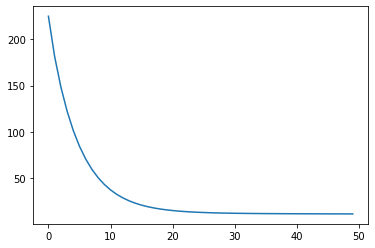

In [32]:
plt.plot(losses)

Error (loss) en la última iteración del descenso de gradiente:

In [33]:
losses[-1]

11.421508828696645

### Parámetros Finales

Pesos:

In [34]:
h.W

array([22.41919277, -0.63857387,  0.60635418, -0.32148667,  0.78147679,
       -0.83198997,  3.2131309 , -0.19729259, -2.02603046,  0.84724766,
       -0.59669091, -1.75820813,  0.91044836, -3.44689692])

Media:

In [35]:
X_med

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01])

Desviación estándar:

In [36]:
X_std

array([8.59304135e+00, 2.32993957e+01, 6.85357058e+00, 2.53742935e-01,
       1.15763115e-01, 7.01922514e-01, 2.81210326e+01, 2.10362836e+00,
       8.69865112e+00, 1.68370495e+02, 2.16280519e+00, 9.12046075e+01,
       7.13400164e+00])

### Uso del modelo 

Estimar el valor de la casa 25.

In [37]:
num_casa=210

Características de la casa 25:

In [38]:
casa = boston_dataset.data[num_casa-1]
print(f'casa_{num_casa}:{casa}')

casa_210:[  0.43571   0.       10.59      1.        0.489     5.344   100.
   3.875     4.      277.       18.6     396.9      23.09   ]


Preprocesamiento de la casa 25:

In [39]:
casa_prep = (casa - X_med) / X_std
casa_prep = np.append([1],casa_prep)
print(f'casa_25_prep:{casa_prep}')

casa_25_prep:[ 1.         -0.36981244 -0.48772236 -0.07978012  3.66839786 -0.56749561
 -1.34008294  1.11749449  0.03800924 -0.6379618  -0.77945458  0.06679585
  0.44105193  1.46298491]


Predicción del costo de la casa 25:

In [40]:
h(casa_prep)

16.286773988338915

Valor real de la casa 20

In [41]:
Y[num_casa-1]

20.0

In [42]:
X.shape

(506, 14)

In [43]:
np.mean(np.abs(predict(X) - Y))

3.2280802838169342